# Convolutional Neural Network

### Importing the libraries

In [1]:
pip install tensorflow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
# Training data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to be between 0 and 1
    shear_range=0.2,  # Randomly apply shear transformations to images
    zoom_range=0.2,   # Randomly zoom in on images
    horizontal_flip=True  # Randomly flip images horizontally
)

# Generating batches of images with the above transformations from the 'training_set' directory
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',  # Path to the training images folder
    target_size=(64, 64),  # Resize images to 64x64 pixels
    batch_size=32,         # Number of images per batch
    class_mode='binary'    # Binary classification (cat or dog)
)


Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
# Test data preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale test images

# Generating batches of images for testing from the 'test_set' directory
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',  # Path to the test images folder
    target_size=(64, 64),  # Resize images to 64x64 pixels
    batch_size=32,         # Number of images per batch
    class_mode='binary'    # Binary classification (cat or dog)
)


Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
# Initialize the CNN
cnn = tf.keras.models.Sequential()

# Add a convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Add a pooling layer
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Add a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Flatten the layers
cnn.add(tf.keras.layers.Flatten())

# Add a fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add the output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


D:\Project\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 1 - Convolution

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the CNN
cnn = Sequential()

# Input layer specifying the shape of the input images (64x64x3)
cnn.add(Input(shape=(64, 64, 3)))

# Add a convolutional layer
cnn.add(Conv2D(filters=32,   # Number of filters
               kernel_size=3,  # Size of the filter (3x3)
               activation='relu'))  # Activation function (ReLU)

# Add a pooling layer
cnn.add(MaxPooling2D(pool_size=2, strides=2))  # MaxPooling with 2x2 filter

# Add a second convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the layers
cnn.add(Flatten())

# Add a fully connected layer
cnn.add(Dense(units=128, activation='relu'))

# Add the output layer (binary classification: cat or dog)
cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model to check the architecture
cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

### Step 2 - Pooling

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the CNN
cnn = Sequential()

# Input layer specifying the shape of the input images (64x64x3)
cnn.add(Input(shape=(64, 64, 3)))

# First Convolutional Layer
cnn.add(Conv2D(filters=32,   # Number of filters
               kernel_size=3,  # Size of the filter (3x3)
               activation='relu'))  # Activation function (ReLU)

# First Max Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # MaxPooling with 2x2 pool size

# Second Convolutional Layer
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Second Max Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # MaxPooling with 2x2 pool size

# Flatten the layers (to feed into a fully connected layer)
cnn.add(Flatten())

# Add a fully connected layer
cnn.add(Dense(units=128, activation='relu'))

# Add the output layer (binary classification: cat or dog)
cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model to check the architecture
cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

### Adding a second convolutional layer

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the CNN
cnn = Sequential()

# Input layer specifying the shape of the input images (64x64x3)
cnn.add(Input(shape=(64, 64, 3)))

# First Convolutional Layer
cnn.add(Conv2D(filters=32,   # Number of filters
               kernel_size=3,  # Size of the filter (3x3)
               activation='relu'))  # Activation function (ReLU)

# First Max Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # MaxPooling with 2x2 pool size

# Second Convolutional Layer
cnn.add(Conv2D(filters=64,   # Number of filters (increased from 32 to 64)
               kernel_size=3,  # Size of the filter (3x3)
               activation='relu'))  # Activation function (ReLU)

# Second Max Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # MaxPooling with 2x2 pool size

# Flatten the layers (to feed into a fully connected layer)
cnn.add(Flatten())

# Add a fully connected layer
cnn.add(Dense(units=128, activation='relu'))

# Add the output layer (binary classification: cat or dog)
cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model to check the architecture
cnn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

### Step 3 - Flattening

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Initialize the CNN
cnn = Sequential()

# Step 1: Adding the first convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

# Step 2: Adding the max pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 3: Adding the second convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Step 4: Adding the second max pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 5: Flattening the results to make them suitable for the fully connected layer
cnn.add(Flatten())

# Step 6: Adding a fully connected (dense) layer
cnn.add(Dense(units=128, activation='relu'))  # 128 neurons in the dense layer

# Step 7: Adding the output layer (for binary classification, use 'sigmoid')
cnn.add(Dense(units=1, activation='sigmoid'))

# Step 8: Compile the model
cnn.compile(optimizer=Adam(), loss='binary


SyntaxError: unterminated string literal (detected at line 30) (3986883692.py, line 30)

### Step 4 - Full Connection

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Initialize the CNN
cnn = Sequential()

# Step 1: Adding the first convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

# Step 2: Adding the max pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 3: Adding the second convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Step 4: Adding the second max pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 5: Flattening the results to make them suitable for the fully connected layer
cnn.add(Flatten())

# Step 6: Adding a fully connected (dense) layer
cnn.add(Dense(units=128, activation='relu'))  # 128 neurons in the dense layer

# Step 7: Adding the output layer (for binary classification, use 'sigmoid')
cnn.add(Dense(units=1, activation='sigmoid'))

# Step 8: Compile the model
cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model to show the structure
cnn.summary()


D:\Project\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

### Step 5 - Output Layer

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Initialize the CNN
cnn = Sequential()

# Step 1: Adding the first convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

# Step 2: Adding the max pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 3: Adding the second convolutional layer
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Step 4: Adding the second max pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 5: Flattening the results to make them suitable for the fully connected layer
cnn.add(Flatten())

# Step 6: Adding a fully connected (dense) layer
cnn.add(Dense(units=128, activation='relu'))  # 128 neurons in the dense layer

# Step 7: Adding the output layer (for binary classification, use 'sigmoid')
cnn.add(Dense(units=1, activation='sigmoid'))  # 1 unit for binary classification (Dog or Cat)

# Step 8: Compile the model
cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model to show the structure
cnn.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the CNN
cnn = Sequential()

# Input layer specifying the shape of the input images (64x64x3)
cnn.add(Input(shape=(64, 64, 3)))

# First Convolutional Layer
cnn.add(Conv2D(filters=32,   # Number of filters
               kernel_size=3,  # Size of the filter (3x3)
               activation='relu'))  # Activation function (ReLU)

# First Max Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # MaxPooling with 2x2 pool size

# Second Convolutional Layer
cnn.add(Conv2D(filters=64,   # Number of filters (increased from 32 to 64)
               kernel_size=3,  # Size of the filter (3x3)
               activation='relu'))  # Activation function (ReLU)

# Second Max Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # MaxPooling with 2x2 pool size

# Flatten the layers (to feed into a fully connected layer)
cnn.add(Flatten())  # This converts the 2D feature map to a 1D vector

# Add a fully connected layer
cnn.add(Dense(units=128, activation='relu'))

# Add the output layer (binary classification: cat or dog)
cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model to check the architecture
cnn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

### Training the CNN on the Training set and evaluating it on the Test set

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the CNN
cnn = Sequential()

# Input layer specifying the shape of the input images (64x64x3)
cnn.add(Input(shape=(64, 64, 3)))

# First Convolutional Layer
cnn.add(Conv2D(filters=32,   # Number of filters
               kernel_size=3,  # Size of the filter (3x3)
               activation='relu'))  # Activation function (ReLU)

# First Max Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # MaxPooling with 2x2 pool size

# Second Convolutional Layer
cnn.add(Conv2D(filters=64,   # Number of filters (increased from 32 to 64)
               kernel_size=3,  # Size of the filter (3x3)
               activation='relu'))  # Activation function (ReLU)

# Second Max Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # MaxPooling with 2x2 pool size

# Flatten the layers (to feed into a fully connected layer)
cnn.add(Flatten())  # This converts the 2D feature map to a 1D vector

# Add a fully connected layer
cnn.add(Dense(units=128, activation='relu'))

# Add the output layer (binary classification: cat or dog)
cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize ImageDataGenerators for training and test sets
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize the image pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# Set the path to your training and test sets
train_directory = 'dataset/training_set'  # Path to training dataset
test_directory = 'dataset/test_set'  # Path to test dataset

# Create flow_from_directory for loading the images
train_data = train_datagen.flow_from_directory(
    train_directory,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,         # Number of images per batch
    class_mode='binary'    # Binary classification (dog or cat)
)

test_data = test_datagen.flow_from_directory(
    test_directory,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,         # Number of images per batch
    class_mode='binary'    # Binary classification (dog or cat)
)

# Train the model on the training data
cnn.fit(
    train_data,  # Training data
    steps_per_epoch=train_data.samples // train_data.batch_size,  # Total batches per epoch
    epochs=10,  # Number of epochs to train the model
    validation_data=test_data,  # Validation on the test data
    validation_steps=test_data.samples // test_data.batch_size  # Number of batches to validate
)

# Evaluate the model on the test data
test_loss, test_accuracy = cnn.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10


D:\Project\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 110s 412ms/step - accuracy: 0.5512 - loss: 0.7145 - val_accuracy: 0.6704 - val_loss: 0.6281
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.5611
Epoch 3/10


D:\Project\anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - accuracy: 0.6907 - loss: 0.5867 - val_accuracy: 0.7293 - val_loss: 0.5406
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.7315
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.7639 - loss: 0.4888 - val_accuracy: 0.7480 - val_loss: 0.5165
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.4733
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.7977 - loss: 0.4405 - val_accuracy: 0.7540 - val_loss: 0.5119
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5329
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 125ms/step - accuracy: 0.8309 - loss: 0.3710 - val_accuracy: 0.7661 - val_loss: 0.5121
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.0000

## Part 4 - Making a single prediction

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [25]:
# Replace with the actual path of the image you want to predict
img_path = 'dataset/single_prediction/cat_or_dog_1.jpg'

# Step 1: Load the image and resize it to match the model input shape (64x64)
img = image.load_img(img_path, target_size=(64, 64))

# Step 2: Convert the image to a numpy array
img_array = image.img_to_array(img)

# Step 3: Rescale the image to match the model's input format (pixel values between 0 and 1)
img_array = img_array / 255.0

# Step 4: Reshape the image to match the batch format (model expects batches of images)
img_array = np.expand_dims(img_array, axis=0)


In [26]:
# Step 5: Make a prediction using the trained model
prediction = cnn.predict(img_array)

# Step 6: Interpret the result
if prediction[0] >= 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Dog


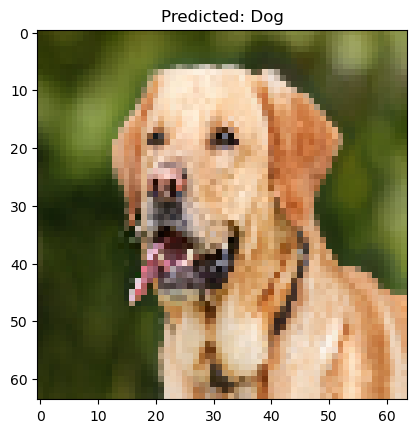

In [27]:
# Optional: Display the image being predicted with the prediction label
plt.imshow(img)
plt.title("Predicted: " + ("Dog" if prediction[0] >= 0.5 else "Cat"))
plt.show()
